# <center>Pandas</center>


In [63]:
import numpy as np
import statistics
import seaborn as sns
import pandas as pd
%matplotlib inline

**Get data from 'titanic_train.csv' into Pandas.DataFrame**

In [25]:
data = pd.read_csv('titanic_train.csv',
                  index_col='PassengerId')

In [26]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [27]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Passengers with Embarked= C and price for ticket higher than 200**

In [32]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Sort by ticket price**

In [34]:
data[(data['Embarked'] == 'S') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S


**Add new column**

In [49]:
def age_category(age):
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [50]:
age_categories = [age_category(age) for age in data.Age]

In [51]:
data['Age_category'] = age_categories # or data['Age_category'] = data['Age'].apply(age_category)

In [52]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,3
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,2
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1


**Sex statistics**

In [44]:
data.groupby("Sex")["Sex"].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

**Quantity of men, women in each class**


In [53]:
pd.crosstab(data['Pclass'], data['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


**Mediana and deviation based on 'Fare'**

In [54]:
mediana = round(data['Fare'].median(),2)
deviation = round(statistics.stdev(data['Fare']),2)
print("Mediana - {0}, deviation - {1}".format(mediana,deviation))

Mediana - 14.45, deviation - 49.69


**Statistics of survival people by age category**


In [48]:
def age_category(age):
    if age < 25:
        return "Younger than 25"
    elif age > 25 and age < 35:
         return "Older than 25 and younger than 35"
    elif age > 35 and age < 50:
         return "Older than 35 and younger than 50"
    elif age > 50:
        return "Older than 50"
age_categories = [age_category(age) for age in data.Age]
data['Age_category'] = age_categories
pd.crosstab(data['Age_category'], data['Survived'],normalize='index')

Survived,0,1
Age_category,,
Older than 25 and younger than 35,0.595506,0.404494
Older than 35 and younger than 50,0.608392,0.391608
Older than 50,0.656250,0.343750
Younger than 25,0.575540,0.424460


<AxesSubplot:xlabel='Age_category'>

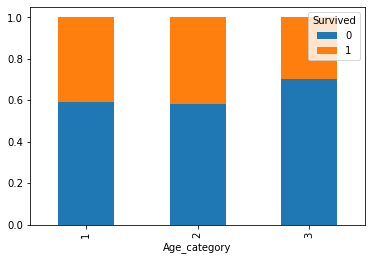

In [59]:
pd.crosstab(data['Age_category'], data['Survived'],normalize='index').plot.bar(stacked=True)

**Statistics of survival people by sex**

In [55]:
pd.crosstab(data['Sex'], data['Survived'], margins=True,normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908
All,0.616162,0.383838


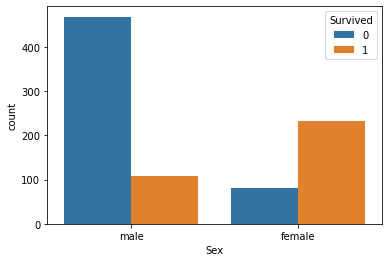

In [65]:
ax = sns.countplot(x="Sex", hue="Survived", data=data)

**Statistics of survival people by class category**

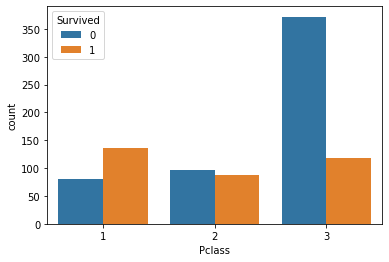

In [68]:
ax = sns.countplot(x="Pclass", hue="Survived", data=data)

**The most popular male name**

In [57]:
data2 = data[data.Sex == 'male']['Name']


C = []
for i in data2:
  if '(' in i:
    if ')' in i.split('(')[1].split(' ')[0]:
      C.append(i.split('(')[1].split(' ')[0].split(')')[0])
    else:
      C.append(i.split('(')[1].split(' ')[0])

  else:
    C.append(i.split('. ')[1].split(' ')[0])

print(pd.DataFrame.from_dict(C)[0].value_counts().nlargest(1))

William    35
Name: 0, dtype: int64
